In [1]:
import pandas as pd

#Load the csv file
data = pd.read_csv("./sample_data/data.csv", encoding = 'utf-8') 
#Drop the first column
data.drop(data.columns[[0]], axis=1, inplace=True)
 
#change te name of the columns
new_headers = {'data/1': 'ETid',
               'data/2': 'img',
               'data/3': 'Authority',
               'data/4': 'Date of decision',
               'data/5': 'Fine',
               'data/6': 'Controller/Processor',
               'data/7': 'Sector',  
               'data/8': 'Quoted Art',
               'data/9': 'Type',
               'data/10': 'Summary',
               'data/11': 'Url1',
               'data/12': 'Url2'
    
    }
#Rename the columns
data.rename(columns=new_headers, inplace=True)
data

,ETid,img,Authority,Date of decision,Fine,Controller/Processor,Sector,Quoted Art,Type,Summary,Url1,Url2
0,ETid-1,<img src='./flags/flag_austria.png' alt='AUSTR...,Austrian Data Protection Authority (dsb),2018-12-09,"4,800",Betting place,Industry and Commerce,Art. 13 GDPR,Insufficient fulfilment of information obligat...,Video surveillance was not sufficiently marked...,<a class='blau' href='https://www.dsb.gv.at/do...,<a href='https://www.enforcementtracker.com/ET...
1,ETid-2,<img src='./flags/flag_austria.png' alt='AUSTR...,Austrian Data Protection Authority (dsb),2018,"1,800",Kebab restaurant,Accomodation and Hospitalty,"Art. 5 GDPR, Art. 13 GDPR, Art. 14 GDPR",Insufficient legal basis for data processing,CCTV was unlawfully used. Sufficient informati...,<a class='blau' href='https://www.dsb.gv.at/do...,<a href='https://www.enforcementtracker.com/ET...
2,ETid-3,<img src='./flags/flag_austria.png' alt='AUSTR...,Austrian Data Protection Authority (dsb),2018-09-27,300,Private car owner,Individuals and Private Associations,"Art. 5 (1) a) GDPR, Art. 6 GDPR",Insufficient legal basis for data processing,A Dashcam was unlawfully used.,<a class='blau' href='https://www.ris.bka.gv.a...,<a href='https://www.enforcementtracker.com/ET...
3,ETid-4,<img src='./flags/flag_austria.png' alt='AUSTR...,Austrian Data Protection Authority (dsb),2018-12-20,"2,200",Private person,Individuals and Private Associations,"Art. 5 (1) a) GDPR, Art. 5 (1) c) GDPR, Art. 6...",Insufficient legal basis for data processing,The fine was imposed against a private person ...,<a class='blau' href='https://www.ris.bka.gv.a...,<a href='https://www.enforcementtracker.com/ET...
4,ETid-5,<img src='./flags/flag_belgium.png' alt='BELGI...,Belgian Data Protection Authority (APD),2019-05-28,"2,000",Mayor,Public Sector and Education,"Art. 5 (1) b) GDPR, Art. 6 GDPR",Insufficient legal basis for data processing,The administrative fine was imposed for the mi...,<a class='blau' href='https://www.autoriteprot...,<a href='https://www.enforcementtracker.com/ET...
...,...,...,...,...,...,...,...,...,...,...,...,...
857,ETid-858,<img src='./flags/flag_norway.png' alt='NORWAY...,Norwegian Supervisory Authority (Datatilsynet),2021-09-20,"40,200",Høylandet Municipality,Public Sector and Education,"Art. 32 (1) b), (2) GDPR",Insufficient technical and organisational meas...,The Norwegian DPA has imposed a fine of EUR 40...,<a class='blau' href='https://www.datatilsynet...,<a href='https://www.enforcementtracker.com/ET...
858,ETid-859,<img src='./flags/flag_norway.png' alt='NORWAY...,Norwegian Supervisory Authority (Datatilsynet),2021-09-20,"75,600",ST. OLAVS HOSPITAL HF,Health Care,"Art. 32 GDPR, § 22 pasientjournalloven, § 23 p...",Insufficient technical and organisational meas...,The Norwegian DPA has fined St. Olav's Hospita...,<a class='blau' href='https://www.datatilsynet...,<a href='https://www.enforcementtracker.com/ET...
859,ETid-860,<img src='./flags/flag_spain.png' alt='SPAIN' ...,Spanish Data Protection Authority (aepd),2021-09-04,"1,500","AMPUDIA DIAZ, S.L.",Accomodation and Hospitalty,"Art. 5 (1) c) GDPR, Art. 13 GDPR",Non-compliance with general data processing pr...,The Spanish DPA (AEPD) has imposed a fine of E...,<a class='blau' href='https://www.aepd.es/es/d...,<a href='https://www.enforcementtracker.com/ET...
860,ETid-861,<img src='./flags/flag_spain.png' alt='SPAIN' ...,Spanish Data Protection Authority (aepd),2021-09-04,"2,000",Store owner,Industry and Commerce,Art. 5 (1) c) GDPR,Non-compliance with general data processing pr...,The Spanish DPA (AEPD) has imposed a fine of E...,<a class='blau' href='https://www.aepd.es/es/d...,<a href='https://www.enforcementtracker.com/ET...


In [4]:
data['Summary'].isnull().values.any()

False

In [5]:
labels = data["Type"].tolist()
labels[:10]

['Insufficient fulfilment of information obligations',
 'Insufficient legal basis for data processing',
 'Insufficient legal basis for data processing',
 'Insufficient legal basis for data processing',
 'Insufficient legal basis for data processing',
 'Insufficient legal basis for data processing',
 'Insufficient legal basis for data processing',
 'Insufficient legal basis for data processing',
 'Insufficient fulfilment of data subjects rights',
 'Insufficient fulfilment of data subjects rights']

In [6]:
documents = data['Summary'].tolist()
summary = " ".join(documents).lower()
summary[:1000]

"video surveillance was not sufficiently marked and a large part of the sidewalk of the facility was recorded. surveillance of the public space in this way, i.e. on a large scale by private individuals, is not permitted. cctv was unlawfully used. sufficient information about the video surveillance was missing. in addition, the storage period of 14 days was too long and therefore against the principle of data minimization. addendum: fine has been reduced to eur 1500 by court, see <a class='blau' href='https://www.dataprotect.at/2020-videoüberwachung-strafe/' target='_blank'>link</a> a dashcam was unlawfully used. the fine was imposed against a private person who was using cctv at his home. the video surveillance covered areas which are intended for the general use of the residents of the multi-party residential complex, namely: parking lots, sidewalks, courtyard, garden and access areas to the residential complex; in addition, the video surveillance covered garden areas of an adjacent p

In [7]:
#Data Cleaning
import string

def clean_text(summary):
    # Remove punctuations from the summary
    translator = str.maketrans('', '', string.punctuation)
    summary = summary.translate(translator)

    # Remove digits from the summary
    remove_digits = str.maketrans('', '', string.digits)
    summary = summary.translate(remove_digits)
    return summary

summary = clean_text(summary=summary)
summary[:1000]

'video surveillance was not sufficiently marked and a large part of the sidewalk of the facility was recorded surveillance of the public space in this way ie on a large scale by private individuals is not permitted cctv was unlawfully used sufficient information about the video surveillance was missing in addition the storage period of  days was too long and therefore against the principle of data minimization addendum fine has been reduced to eur  by court see a classblau hrefhttpswwwdataprotectatvideoüberwachungstrafe targetblanklinka a dashcam was unlawfully used the fine was imposed against a private person who was using cctv at his home the video surveillance covered areas which are intended for the general use of the residents of the multiparty residential complex namely parking lots sidewalks courtyard garden and access areas to the residential complex in addition the video surveillance covered garden areas of an adjacent property the video surveillance subject of the proceeding

In [8]:
#Data analysis
import spacy
nlp = spacy.load('en_core_web_sm')

# Finding size ofnlp.max_length_length w.r.t max_length of spacy model
len(summary) / nlp.max_length

0.41227

In [9]:
# Spliting summary  to match the max length of spacy
summary_chunk = [summary[i:i+nlp.max_length] for i in range (0,len(summary), nlp.max_length)]

In [10]:
docs = []
for chunk in summary_chunk:
    doc = nlp(chunk)
    docs.append(doc)

In [11]:
words = []
nouns = []
verbs = []
people = []
orgs = []

In [12]:
# Finding words, verbs and nouns
for doc in docs:
    for token in doc:
        words.append(token.text)
        if token.pos_ == "VERB":
            verbs.append(token.text)
            
        if token.pos_ == "NOUN":
            nouns.append(token.text)

In [13]:
# Finding organizations and people
for doc in docs:
    for ent in doc.ents:
        if ent.label_ == "ORG":
            orgs.append(ent.text)
        if ent.label_ == "PERSON":
            people.append(ent.text)

In [14]:
print("Total words: ", len(words))
print("Total verbs: ", len(verbs))
print("Total nouns: ", len(nouns))
print("Total people: ", len(people))
print("Total organizations: ", len(orgs))

Total words:  68685
Total verbs:  7659
Total nouns:  20034
Total people:  272
Total organizations:  718


In [15]:
#find the frequency of words, nouns, verbs, poeple, orgs
from collections import Counter
from collections import OrderedDict

def sort_by_frequency(_data,reverse = True):
    """ 
    Function to sord the data by its frequency
    Returns ordered dictionary
    Default: Sort in descending order
        
    """
    data_with_freq = dict(Counter(_data))
    data_sorted_by_freq = OrderedDict(sorted(data_with_freq.items(), key=lambda x: x[1],reverse=reverse))
    
    return data_sorted_by_freq

In [16]:
words_frequency = sort_by_frequency(words)
nouns_frequency = sort_by_frequency(nouns)
verbs_frequency  = sort_by_frequency(verbs)
people_frequency = sort_by_frequency(people)
orgs_frequency = sort_by_frequency(orgs)

In [17]:
words_frequency


OrderedDict([('the', 7025),
             ('of', 3042),
             ('to', 2177),
             ('data', 2029),
             ('a', 1911),
             ('and', 1363),
             (' ', 1285),
             ('in', 1089),
             ('had', 937),
             ('for', 854),
             ('that', 817),
             ('dpa', 733),
             ('on', 713),
             ('was', 699),
             ('controller', 640),
             ('not', 635),
             ('eur', 591),
             ('personal', 564),
             ('fine', 499),
             ('with', 452),
             ('by', 413),
             ('subject', 401),
             ('as', 374),
             ('information', 370),
             ('this', 364),
             ('company', 361),
             ('an', 346),
             ('gdpr', 338),
             ('imposed', 329),
             ('has', 317),
             ('processing', 308),
             ('which', 287),
             ('were', 280),
             ('it', 270),
             ('art', 266),
           

**N-gram analysis**:
Basically, an N-gram model predicts the occurrence of a word based on the occurrence of its N – 1 previous words.

In [36]:
import nltk

def create_bigram(tokens):
    # Using words token generated from spacy to find bigram
    bigrams_ = nltk.bigrams(tokens)
    # Convert generator into list of tuples of bigram 
    return list(bigrams_)

In [37]:
bigrams_list = create_bigram(words)
bigrams = [" ".join(bigram) for bigram in list(bigrams_list)]

In [38]:
bigrams[:10]

['video surveillance',
 'surveillance was',
 'was not',
 'not sufficiently',
 'sufficiently marked',
 'marked and',
 'and a',
 'a large',
 'large part',
 'part of']

In [39]:
# Sorting bigram by frequency
bigram_frequency = sort_by_frequency(bigrams)

In [40]:
def get_top_n_from_order_dict(ordered_dict,n):
    """ Function to find n top object from ordered dictionary"""
    return [list(ordered_dict.items())[i] for i in range(n)]

In [41]:
# Finding top 25 bigram
top_bigram = get_top_n_from_order_dict(bigram_frequency,25)
top_bigram

[('of the', 963),
 ('the data', 754),
 ('the controller', 604),
 ('eur  ', 558),
 ('personal data', 521),
 ('to the', 470),
 ('data subject', 388),
 ('that the', 345),
 ('the dpa', 324),
 ('of eur', 314),
 ('in the', 305),
 ('fine of', 295),
 ('a fine', 278),
 ('imposed a', 257),
 ('data subjects', 243),
 ('on the', 237),
 ('with the', 230),
 ('the company', 228),
 ('controller had', 220),
 ('data of', 217),
 ('  on', 212),
 ('did not', 183),
 ('art  ', 179),
 ('by the', 178),
 ('  gdpr', 168)]

In [42]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_list_of_tuple(data):
    """"""
    list1, list2 = zip(*data)
    y_pos = np.arange(len(list1))
    plt.figure(figsize=(15,10))
    plt.barh(y_pos, list2, align='center', alpha=0.5)
    plt.yticks(y_pos, list1)
    plt.show()

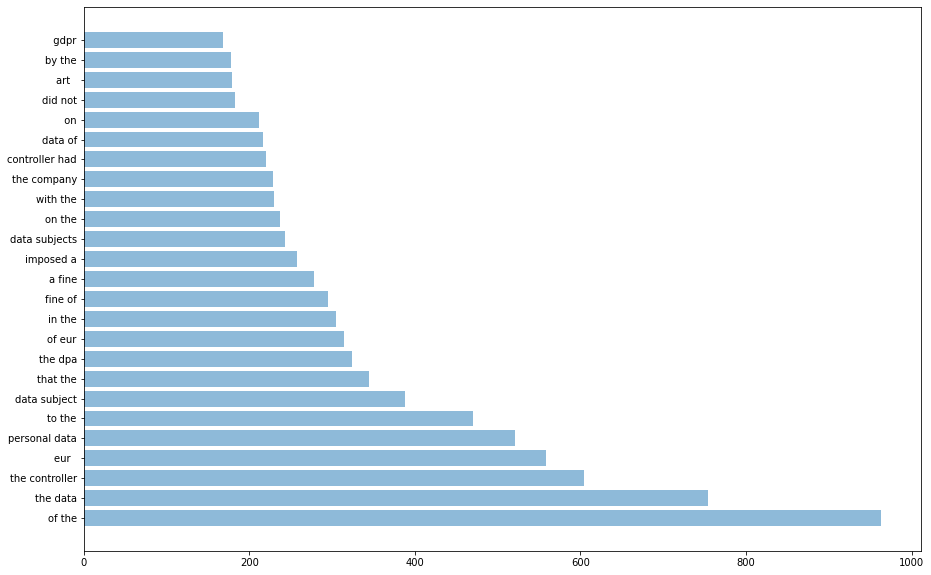

In [43]:
visualize_list_of_tuple(top_bigram)

**Finding unique nouns, verbs, people name and organization name in our text corpus**

In [44]:
unique_nouns = set(nouns)
unique_verbs = set(verbs)
unique_people = set(people)
unique_orgs = set(orgs)

In [45]:
unique_people

{'ac omonia',
 'aepd',
 'aereas sa eur',
 'aeroporto guglielmo',
 'aicomply srl eur',
 'alava norte sl eur',
 'aleksandrów kujawski',
 'android app',
 'anspdcp',
 'anwara sp',
 'apartamentos playa de covachos',
 'apoel fc',
 'arcusa slu',
 'argentaria sa',
 'argentaria sa bbva',
 'argentaria sa eur',
 'art   f gdpr',
 'art   f uk gpdr',
 'asociație de proprietari',
 'atac',
 'autoriteit persoonsgegevens',
 'basaren drift',
 'bolzano eur',
 'bookingcom eur',
 'borgo fonte scura',
 'bucharest sa',
 'caixabank sa eur',
 'capio st göran ab sek',
 'carrefour banque',
 'carrefour fidélité carrefour',
 'cedico centro de diagnóstico por la imágen',
 'certime sa',
 'comercializadora sau',
 'concentrix cvg',
 'coop finnmark',
 'coop finnmark sa',
 'coop finnmark sa eur',
 'courtyard garden',
 'ddos',
 'de españa sau',
 'de médicos demócratas',
 'de tráfico',
 'del principado de asturias',
 'deliveroo italy',
 'desolasol restauración sl eur',
 'dgt',
 'distancia sa',
 'dpa aepd',
 'dpa apd',
 'dp

In [46]:
# Both words Nouns
def get_noun_noun_bigram(bigrams):
    "Find bigram with both word noun"
    NN_bigrams = []
    for first_word,second_word in bigrams:
        if first_word in unique_nouns and second_word in unique_nouns:
            NN_bigrams.append(" ".join((first_word,second_word)))
    return NN_bigrams
NN_bigrams = get_noun_noun_bigram(bigrams_list)
NN_bigrams

['video surveillance',
 'public space',
 'way ie',
 'video surveillance',
 'storage period',
 'data minimization',
 'minimization addendum',
 'addendum fine',
 'classblau hrefhttpswwwdataprotectatvideoüberwachungstrafe',
 'hrefhttpswwwdataprotectatvideoüberwachungstrafe targetblanklinka',
 'video surveillance',
 'parking lots',
 'lots sidewalks',
 'sidewalks courtyard',
 'courtyard garden',
 'access areas',
 'video surveillance',
 'garden areas',
 'video surveillance',
 'surveillance subject',
 'controller video',
 'video surveillance',
 'video surveillance',
 'surveillance records',
 'films residents',
 'image data',
 'video surveillance',
 'campaign purposes',
 'consumer credit',
 'credit agreement',
 'data subject',
 'telecommunications provider',
 'data subject',
 'identification number',
 'identity card',
 'card number',
 'complainants one',
 'student wihtout',
 'police investigators',
 'police investigator',
 'name andor',
 'andor publishing',
 'publishing photographs',
 'faceboo

In [47]:
# First word verb
def get_bigram_starting_with_verb(bigrams):
    V_bigrams = []
    for first_word,second_word in bigrams:
        if first_word in unique_verbs:
            V_bigrams.append(" ".join((first_word,second_word)))
            
    return V_bigrams
V_bigrams = get_bigram_starting_with_verb(bigrams_list)
V_bigrams

['marked and',
 'recorded surveillance',
 'ie on',
 'permitted cctv',
 'used sufficient',
 'missing in',
 'principle of',
 'fine has',
 'reduced to',
 'eur  ',
 'see a',
 'targetblanklinka a',
 'used the',
 'fine was',
 'imposed against',
 'using cctv',
 'covered areas',
 'intended for',
 'use of',
 'access areas',
 'covered garden',
 'subject of',
 'limited to',
 'control of',
 'limited to',
 'records the',
 'entering and',
 'leaving the',
 'surrounding apartments',
 'intervening in',
 'consent to',
 'record their',
 'indicated the',
 'fine was',
 'imposed for',
 'fine of',
 'eur was',
 'imposed on',
 'calling a',
 'provoked the',
 'evoke his',
 'forgotten after',
 'receiving any',
 'answer from',
 'filed another',
 'take action',
 'filed a',
 'kzld \r\n\r\n',
 'fined was',
 'processing of',
 'linked to',
 'processed was',
 'communicated at',
 'had in',
 'view of',
 'kzld to',
 'request additional',
 'consent from',
 'repeated registration',
 'prepaid services',
 'knowledge and',
 'co

In [48]:
# First word organization 
def get_bigram_starting_with_organization(bigrams):
    org_bigrams = []
    for first_word,second_word in bigrams:
        if first_word in unique_orgs:
            org_bigrams.append(" ".join((first_word,second_word)))
    return org_bigrams
org_bigrams = get_bigram_starting_with_organization(bigrams_list)
org_bigrams

['cctv was',
 'eur  ',
 'cctv at',
 'bgn or',
 'eur was',
 'gdpr and',
 'gdpr could',
 'gdpr for',
 'gdpr unless',
 'eur  ',
 'gdpr unless',
 'eur  ',
 'gdpr should',
 'gdpr as',
 'gdpr became',
 'google account',
 'euros for',
 'gdpr insufficient',
 'gdpr and',
 'gdpr the',
 'gdpr the',
 'euros on',
 'gdpr when',
 'party unknown',
 'cctv recordings',
 'eur  ',
 'party for',
 'gdpr article',
 'party movimento',
 'gdpr related',
 'gdpr since',
 'gdpr would',
 'google search',
 'gdpr only',
 'gdpr expressly',
 'pesel numbers',
 'setsi decided',
 'app which',
 'app about',
 'app did',
 'eur k',
 'queried the',
 'party by',
 'party \r\n\r\n',
 'gdpr can',
 'cctv when',
 'eur in',
 'eur to',
 'eur was',
 'party who',
 'party the',
 'party was',
 'ico issued',
 'gdpr infringements',
 'gdpr the',
 'ico by',
 'ico ’s',
 'eur  ',
 'ico emphasized',
 'ico issued',
 'ico by',
 'ico ’s',
 'ico announced',
 'eur  ',
 'ico set',
 'marriotts absence',
 'ico noted',
 'avocatooro website',
 'avocatooro

In [49]:
# First word organization 
def get_bigram_starting_with_person(bigrams):
    people_bigrams = []
    for first_word,second_word in bigrams:
        if first_word in unique_people:
            people_bigrams.append(" ".join((first_word,second_word)))
    return people_bigrams
people_bigrams = get_bigram_starting_with_person(bigrams_list)
people_bigrams

['eur  ',
 'eur was',
 'gdpr and',
 'gdpr could',
 'gdpr for',
 'gdpr unless',
 'eur  ',
 'gdpr unless',
 'eur  ',
 'gdpr should',
 'gdpr as',
 'gdpr became',
 'euros for',
 'gdpr insufficient',
 'gdpr and',
 'gdpr the',
 'gdpr the',
 'euros on',
 'gdpr when',
 'eur  ',
 'gdpr article',
 'gdpr related',
 'gdpr since',
 'gdpr would',
 'gdpr only',
 'gdpr expressly',
 'vodafone had',
 'vodafone reported',
 'aepd found',
 'aepd laliga',
 'vodafone customer',
 'vodafone to',
 'eur k',
 'gdpr can',
 'eur in',
 'eur to',
 'eur was',
 'aepd found',
 'gdpr infringements',
 'gdpr the',
 'eur  ',
 'marriott international',
 'marriott in',
 'marriott subsequently',
 'marriott failed',
 'eur  ',
 'marriott international',
 'marriott had',
 'eur every',
 'eur the',
 'gdpr lastly',
 'gdpr a',
 'gdpr is',
 'gdpr and',
 'gdpr the',
 'gdpr when',
 'messaging app',
 'eur  ',
 'euros on',
 'eur  ',
 'eur  ',
 'aepd has',
 'euros for',
 'euros which',
 'aepd requested',
 'aepd was',
 'gdpr the',
 'eur  ',

In [50]:
#Sort by frequency
NN_bigrams_frequency = sort_by_frequency(NN_bigrams)
V_bigrams_frequency  = sort_by_frequency(V_bigrams)
people_bigrams_frequency = sort_by_frequency(people_bigrams)
org_bigrams_frequency = sort_by_frequency(org_bigrams)
people_bigrams_frequency

OrderedDict([('eur  ', 558),
             ('gdpr the', 87),
             ('aepd has', 81),
             ('gdpr and', 66),
             ('aepd imposed', 41),
             ('vodafone españa', 25),
             ('españa sau', 17),
             ('gdpr in', 14),
             ('gdpr as', 13),
             ('aepd fined', 13),
             ('gdpr  ', 12),
             ('anspdcp has', 12),
             ('gdpr \r\n', 11),
             ('eur   ', 10),
             ('gdpr art', 9),
             ('aepd found', 8),
             ('aepd the', 8),
             ('robinson tours', 8),
             ('aepd against', 7),
             ('gdpr for', 6),
             ('vodafone had', 6),
             ('gdpr eur', 6),
             ('gdpr \r\n\r\n', 6),
             ('aepd considered', 6),
             ('nordic ab', 6),
             ('gdpr according', 5),
             ('robinson list', 5),
             ('medicall co', 5),
             ('medicall had', 5),
             ('eur was', 4),
             ('euros on', 4),

In [51]:
V_bigrams_frequency

OrderedDict([('eur  ', 558),
             ('fine of', 295),
             ('imposed a', 257),
             ('processing of', 141),
             ('had not', 140),
             ('found that', 135),
             ('access to', 115),
             ('had been', 96),
             ('subject had', 90),
             ('principle of', 87),
             ('gdpr the', 87),
             ('failed to', 85),
             ('according to', 82),
             ('measures to', 81),
             ('aepd has', 81),
             ('gdpr and', 66),
             ('breach of', 62),
             ('comply with', 55),
             ('reduced to', 52),
             ('filed a', 47),
             ('had installed', 44),
             ('use of', 41),
             ('consent of', 41),
             ('aepd imposed', 41),
             ('processing the', 39),
             ('failing to', 38),
             ('regarding the', 38),
             ('fine was', 37),
             ('article  ', 37),
             ('stated that', 35),
             

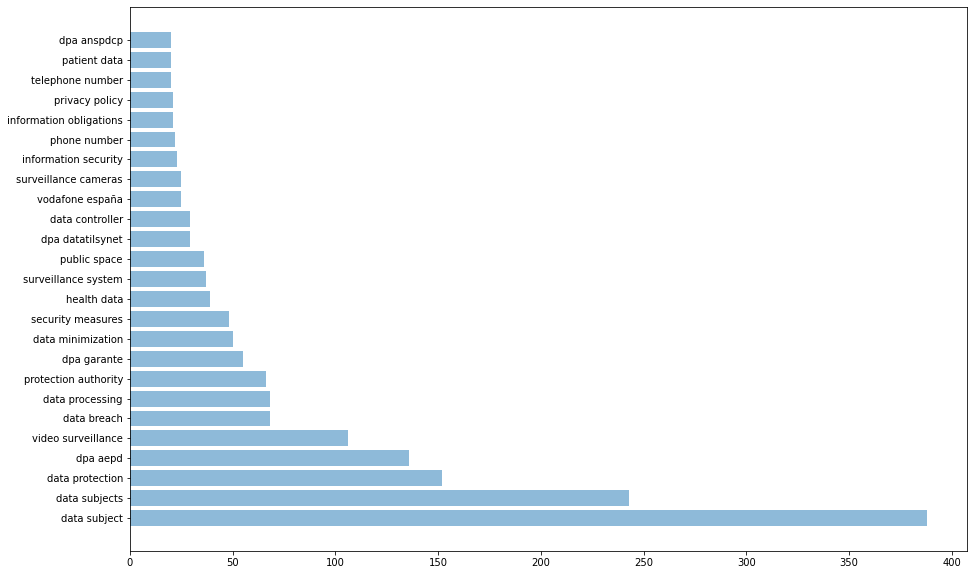

In [52]:
#Finding top 25 bigram with both nouns
top_25_NN_bigram = get_top_n_from_order_dict(NN_bigrams_frequency,25)
visualize_list_of_tuple(top_25_NN_bigram)

**Summary Clustering**

In [53]:
cleaned_documents = []
for document in documents:
    document = clean_text(document).lower()
    cleaned_documents.append(document)
documents = cleaned_documents
documents[0]

'video surveillance was not sufficiently marked and a large part of the sidewalk of the facility was recorded surveillance of the public space in this way ie on a large scale by private individuals is not permitted'

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import time
from sklearn.cluster import KMeans

In [55]:
class SummaryCluster:
    """Class to cluster summary"""
    def __init__(self,model,data,labels):
    #def __init__(self,model,data):
        self.model = model
        self.data = data
        self.labels = labels
        self.model_name = self._get_model_name()
        
        self.cluster_pipeline = None
        
    
    def _get_model_name(self):
        """Get name of model being used"""
        model_name = str(self.model).split('(')[0]
        return model_name
            

    
    def train_model(self,ngram,use_idf):
        """ 
            Train model
            ngram: int
            use_idf: bool
            analyzer: string
        
        """
        current_time = time.time()
        self._ngram = ngram
        self._use_idf = use_idf
        
        # Set a pipeline
        # 1. The first step of the pipeline is to find count vectorizer
        # Countvectorizer converts a collection of text documents to a matrix of token counts
        # This implementation produces a sparse representation of the counts
        # 2. We then use TfidfTransformr
        # TfidfTransformer transforms a count matrix to a normalized tf or tf-idf representation
        # Tf means term-frequency while tf-idf means term-frequency times inverse document-frequency

        self.cluster_pipeline = Pipeline([('vect', CountVectorizer(ngram_range=(1,ngram), 
                analyzer="word")), ('tfidf', TfidfTransformer(use_idf=use_idf)), 
                ('model', self.model)])
        self._cluster = self.cluster_pipeline.fit(self.data)
        
        self._train_time = time.time() - current_time
        
        
        print("Training completed")
        print("Training time for {} : {} secs".format(self.model_name, self._train_time))
        
    
    def predict(self):
        """
        Predict cluster id for all clusters
        """
        self.label_id_dict = {}
        self.summary_id_dict = {}
        self.cluster_id = []
        for i, document in enumerate(self.data):
            cluster_id = self.cluster_pipeline.predict([document])[0]
            self.label_id_dict.update({self.labels[i]:cluster_id})
            self.summary_id_dict.update({document:cluster_id})
            self.cluster_id.append(cluster_id)
        
        #return self.summary_id_dict
        return self.label_id_dict, self.summary_id_dict

In [56]:
cluster_number = 3

In [57]:
model = KMeans(n_clusters=cluster_number, init = "k-means++",max_iter=150,n_init=1)

In [58]:
summary_cluster = SummaryCluster(data=documents,model=model,labels=labels)

In [59]:
#Train our pipeline
summary_cluster.train_model(ngram=2, use_idf=True)

Training completed
Training time for KMeans : 1.7427892684936523 secs


In [60]:
#We will use predict method from our SummaryCluster class
result_label,result_summary = summary_cluster.predict()


In [61]:
result_label

{'Insufficient cooperation with supervisory authority': 1,
 'Insufficient data processing agreement': 1,
 'Insufficient fulfilment of data breach notification obligations': 1,
 'Insufficient fulfilment of data subjects rights': 1,
 'Insufficient fulfilment of information obligations': 1,
 'Insufficient legal basis for data processing': 1,
 'Insufficient technical and organisational measures to ensure information security': 1,
 'Lack of appointment of data protection officer': 1,
 'Non-compliance with general data processing principles': 1,
 'Unknown': 2}

In [62]:
summary_cluster.cluster_id

[2,
 2,
 2,
 2,
 0,
 1,
 1,
 0,
 0,
 1,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 1,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 0,
 1,
 0,
 2,
 1,
 1,
 1,
 0,
 2,
 2,
 2,
 2,
 1,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 1,
 1,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 1,
 2,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 1,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 1,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 1,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 0,


In [66]:
#We will now separate text clusters into different corpus for further analysis
clusters_text = []
for i in range(3):
    text = " ".join([k for k,v in result_summary.items() if v == i])
    clusters_text.append(text)

In [67]:
clusters_text[0]

'the administrative fine was imposed for the misuse of personal data by a mayor for campaign purposes a bank gained personal data concernign a student wihtout a legal basis an employee sent a request to his employer for access to personal data concerning him the request was not answered in time and not in a complete way data was not processed in a manner that ensures appropriate security of the personal data including protection against unauthorised or unlawful processing and against accidental loss destruction or damage using appropriate technical or organisational measures integrity and confidentiality data was not only processed if adequate relevant and limited to what is necessary in relation to the purposes for which they are processed data minimisation and not only kept in a form which permits identification of data subjects for no longer than is necessary for the purposes for which the personal data are processed storage limitation the bank established a personal bank account fo

**Analysing bigrams of all the clusters**

In [68]:
#We will be taking only top 25 bigram of all clusters
def get_cluster_analysis_results(clusters_text):
    all_clusters = {}

    for i, corpus in enumerate(clusters_text):
        tokens = corpus.split()
        # Using words token generated from spacy to find bigram
        bigram_list = create_bigram(tokens)
        bigrams = [" ".join(bigram) for bigram in list(bigram_list)]
        bigram_frequency = sort_by_frequency(bigrams)
        top_bigrams = get_top_n_from_order_dict(bigram_frequency,25)

        # Finding bigrams with Both words Nouns
        NN_bigrams = get_noun_noun_bigram(bigram_list)
        NN_bigrams_frequency = sort_by_frequency(NN_bigrams)
        top_NN_bigrams = get_top_n_from_order_dict(NN_bigrams_frequency,25)

        # Finding bigram starting with verb
        V_bigrams = get_bigram_starting_with_verb(bigram_list)
        V_bigrams_frequency = sort_by_frequency(V_bigrams)
        top_V_bigrams = get_top_n_from_order_dict(V_bigrams_frequency,25)


        # Finding bigram starting with person name
        people_bigrams = get_bigram_starting_with_person(bigram_list)
        people_bigrams_frequency = sort_by_frequency(people_bigrams)
        top_people_bigrams = get_top_n_from_order_dict(people_bigrams_frequency,25)

        # Finding 
        org_bigrams = get_bigram_starting_with_organization(bigram_list)
        org_bigrams_frequency = sort_by_frequency(org_bigrams)
        top_org_bigrams = get_top_n_from_order_dict(org_bigrams_frequency,8)


        cluster_analysis_result = {"bigram_freq":top_bigrams,"noun_noun_bigram":top_NN_bigrams,
                                       "verb_bigram":top_V_bigrams, "people_bigram": top_people_bigrams,
                                       "organization_bigram":top_org_bigrams}
        all_clusters.update({i:cluster_analysis_result})
    
    return all_clusters

all_clusters = get_cluster_analysis_results(clusters_text=clusters_text)

In [69]:
cluster_id = 0
all_clusters[cluster_id]

{'bigram_freq': [('personal data', 218),
  ('of the', 162),
  ('the data', 122),
  ('data of', 100),
  ('to the', 87),
  ('access to', 70),
  ('of personal', 57),
  ('the personal', 55),
  ('data subject', 54),
  ('of a', 44),
  ('data subjects', 42),
  ('data protection', 40),
  ('in the', 40),
  ('processing of', 40),
  ('for the', 39),
  ('technical and', 39),
  ('that the', 38),
  ('measures to', 37),
  ('to ensure', 36),
  ('a data', 32),
  ('found that', 31),
  ('the company', 31),
  ('on the', 29),
  ('protection authority', 29),
  ('eur for', 28)],
 'noun_noun_bigram': [('data subject', 54),
  ('data subjects', 42),
  ('data protection', 40),
  ('protection authority', 29),
  ('data breach', 20),
  ('patient data', 18),
  ('information security', 18),
  ('health data', 15),
  ('security measures', 13),
  ('art gdpr', 11),
  ('data controller', 10),
  ('risk analysis', 8),
  ('information system', 8),
  ('robinson tours', 8),
  ('data processing', 7),
  ('dpa integritetsskyddsmy

**ompare different bigrams of these clusters**

In [70]:
def compare_bigram_of_clusters(comparision_parameter):
    """ 
    Function which creates dataframe for given parameter for all clusters
    Helpful for comparitive study
    """
    cluster_data = {}
    for cluster_id in range(cluster_number):
        cluster_result = all_clusters[cluster_id]
        data = cluster_result[comparision_parameter]
        bigram, frequency = zip(*data)
        col1 = "bigram_cluster_" + str(cluster_id)
        col2 = "bigram_freq_cluster_" + str(cluster_id)
        cluster_data.update({col1:bigram, col2: frequency})
    return pd.DataFrame(data=cluster_data)

In [71]:
df = compare_bigram_of_clusters("bigram_freq")
df

,bigram_cluster_0,bigram_freq_cluster_0,bigram_cluster_1,bigram_freq_cluster_1,bigram_cluster_2,bigram_freq_cluster_2
0,personal data,218,of the,575,of the,202
1,of the,162,the controller,572,the company,118
2,the data,122,the data,517,the data,101
3,data of,100,to the,293,to the,87
4,to the,87,the dpa,288,personal data,86
5,access to,70,data subject,287,in the,77
6,of personal,57,of eur,275,data protection,62
7,the personal,55,fine of,249,that the,59
8,data subject,54,a fine,241,did not,55
9,of a,44,that the,241,on the,54


A bigram (or 2-gram) is a two-word sequence like "the data" "personal data".
In this case we can see that in clusters 0,1 and 2 seems to have similar descriptions related to **DATA** and **PERSONAL DATA** in addition we can see that we have the top 25 biogram frequency in the table.
we can observe that the most frequent bigram for all the clusters are made of stop words like on the, of a, to a, etc

**Visualize and validate the obtained results**


##### Important word combinations cluster 0 ####
personal data of the the data data of to the access to of personal the personal data subject of a data subjects data protection in the processing of for the technical and that the measures to to ensure a data found that the company on the protection authority eur for


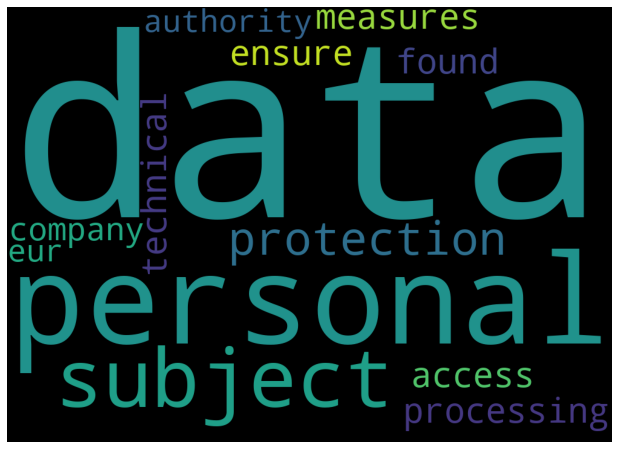

In [93]:
NewNounString=' '.join(df['bigram_cluster_0'])
print('##### frequency of word combinations cluster 0 ####')
print(NewNounString)
# Plotting the wordcloud
%matplotlib inline
import matplotlib.pyplot as plt
 
 
from wordcloud import WordCloud, STOPWORDS
 
# Creating a custom list of stopwords
customStopwords=list(STOPWORDS)  
 
wordcloudimage = WordCloud( max_words=50,
                            font_step=2 ,
                            max_font_size=500,
                            stopwords=customStopwords,
                            background_color='black',
                            width=1000,
                            height=720
                          ).generate(NewNounString)
 
plt.figure(figsize=(20,8))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()

##### frequency of word combinations cluster 1 ####
of the the controller the data to the the dpa data subject of eur fine of a fine that the imposed a controller had personal data eur on in the with the data subjects on the has imposed the spanish spanish dpa art gdpr dpa aepd due to had not


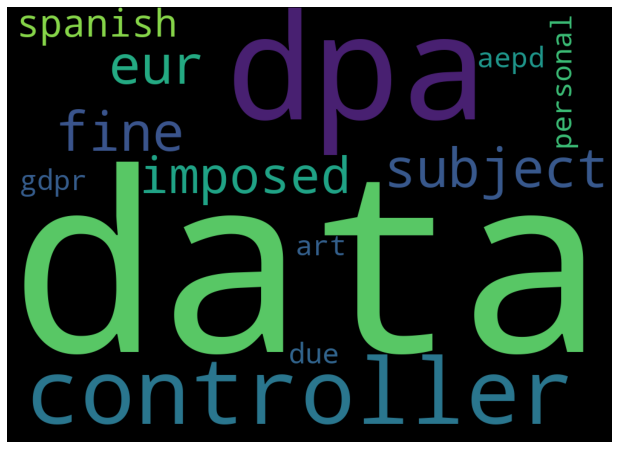

In [96]:
NewNounString=' '.join(df['bigram_cluster_1'])
print('##### frequency of word combinations cluster 1 ####')
print(NewNounString)
# Plotting the wordcloud
%matplotlib inline
import matplotlib.pyplot as plt
 
 
from wordcloud import WordCloud, STOPWORDS
 
# Creating a custom list of stopwords
customStopwords=list(STOPWORDS)  
 
wordcloudimage = WordCloud( max_words=50,
                            font_step=2 ,
                            max_font_size=500,
                            stopwords=customStopwords,
                            background_color='black',
                            width=1000,
                            height=720
                          ).generate(NewNounString)
 
plt.figure(figsize=(20,8))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()

##### frequency of word combinations cluster 2 ####
of the the company the data to the personal data in the data protection that the did not on the with the by the data subject art gdpr of a video surveillance violation of to a legal basis data subjects of data and the data of the fine protection authority


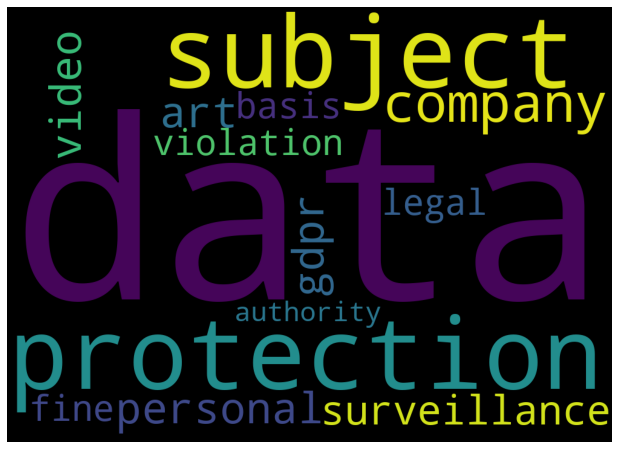

In [97]:
NewNounString=' '.join(df['bigram_cluster_2'])
print('##### frequency of word combinations cluster 2 ####')
print(NewNounString)
# Plotting the wordcloud
%matplotlib inline
import matplotlib.pyplot as plt
 
 
from wordcloud import WordCloud, STOPWORDS
 
# Creating a custom list of stopwords
customStopwords=list(STOPWORDS)  
 
wordcloudimage = WordCloud( max_words=50,
                            font_step=2 ,
                            max_font_size=500,
                            stopwords=customStopwords,
                            background_color='black',
                            width=1000,
                            height=720
                          ).generate(NewNounString)
 
plt.figure(figsize=(20,8))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()

**Saving the dataframe as csv file**


In [98]:
df.to_csv("./sample_data/bigram_frequency.csv")

**Similarly we can analyse data for other parameters too**

In [99]:
df = compare_bigram_of_clusters("noun_noun_bigram")
df

,bigram_cluster_0,bigram_freq_cluster_0,bigram_cluster_1,bigram_freq_cluster_1,bigram_cluster_2,bigram_freq_cluster_2
0,data subject,54,data subject,287,data protection,62
1,data subjects,42,data subjects,159,data subject,42
2,data protection,40,art gdpr,137,art gdpr,41
3,protection authority,29,dpa aepd,134,video surveillance,37
4,data breach,20,video surveillance,63,data subjects,34
5,patient data,18,dpa garante,51,protection authority,28
6,information security,18,data protection,49,data processing,22
7,health data,15,data breach,38,public space,21
8,security measures,13,data processing,37,dpa datatilsynet,15
9,art gdpr,11,data minimization,33,surveillance cameras,13


In [100]:
# saving the dataframe as csv file
df.to_csv("./sample_data/noun_noun_bigram.csv")

In [101]:
# saving the dataframe witj other parameters as csv file
df = compare_bigram_of_clusters("verb_bigram")
df.to_csv("./sample_data/verb_bigram.csv")

In [102]:
df = compare_bigram_of_clusters("people_bigram")
df.to_csv("./sample_data/people_bigram.csv")

In [103]:
df = compare_bigram_of_clusters("organization_bigram")
df.to_csv("./sample_data/organization_bigram.csv")